In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
import os
os.getcwd()

'C:\\Users\\HARITHA'

In [5]:
os.chdir('C:\\Users\\HARITHA\\Downloads')

In [7]:
dataset=pd.read_csv('C:\\Users\\HARITHA\\Downloads\\Social_Network_Ads.csv')

In [8]:
dataset.head(10).style.set_properties(**{'background-color':'black','color':'gold','border-color':'white'})

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [9]:
dataset.describe().style.set_properties(**{'background-color':'black','color':'gold','border-color':'white'})

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


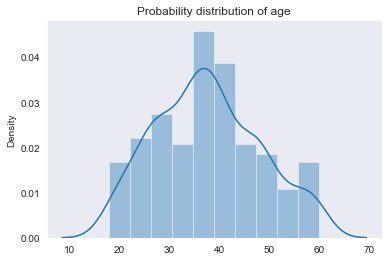

In [14]:
# Exploratory Data Analysis (Univariate Analysis)
# The following plot is a gaussian distribution with maximum value of age of 40
sns.set_style('dark')
sns.distplot(dataset.iloc[:,0].values,kde=True)
plt.title('Probability distribution of age')
plt.show()

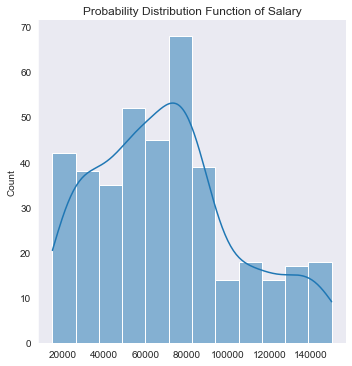

In [16]:
#The following distribution is also a gaussian distribution with maximum density at salary of 8000
sns.set_style("dark")
sns.displot(dataset.iloc[:, 1].values, kde=True)
plt.title("Probability Distribution Function of Salary")
plt.show()

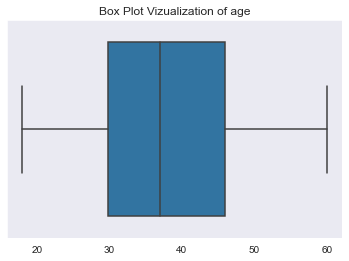

In [18]:
# Box Plot for Outlier Detection
# Presence of no outliners in Age feaure
sns.set_style('dark')
sns.boxplot(x=dataset.iloc[:,0].values)
plt.title('Box Plot Vizualization of age')
plt.show()

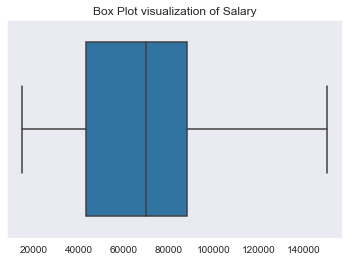

In [19]:
#Presence of no outliners in Salary feature
sns.set_style("dark")
sns.boxplot(x = dataset.iloc[:, 1].values)
plt.title("Box Plot visualization of Salary")
plt.show()

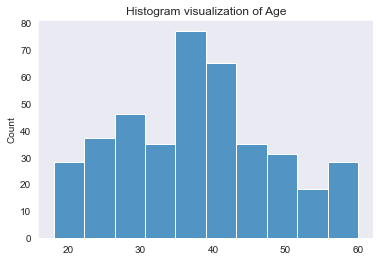

In [21]:
# Histograms
# Maximum count is of age between 35 to 45 in the following dataset
sns.set_style("dark")
sns.histplot(x = dataset.iloc[:, 0].values)
plt.title("Histogram visualization of Age")
plt.show()

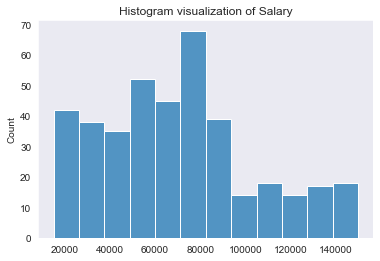

In [23]:
# Dataset mostly users are within salaries less than 90 thousand
sns.set_style("dark")
sns.histplot(x = dataset.iloc[:, 1].values)
plt.title("Histogram visualization of Salary")
plt.show()

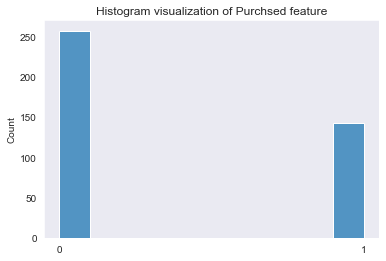

In [24]:
# Categorical Features (Bivariate Analysis)
# Histogram
sns.set_style("dark")
sns.histplot(x = dataset.iloc[:, 2].values)
plt.title("Histogram visualization of Purchsed feature")
plt.xticks([0, 1])
plt.show()

The above count of not purchased is almost double as that of purchased

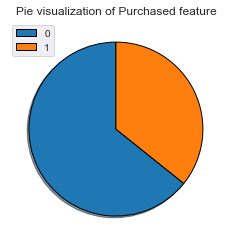

In [26]:
# Pie Plot
plt.pie(dataset.loc[:, dataset.columns[-1]].value_counts(), startangle=90, wedgeprops={'edgecolor': 'black'}, shadow=True)
plt.legend(dataset.loc[:, dataset.columns[-1]].unique())
plt.title("Pie visualization of Purchased feature")
plt.show()

Numerical Features (Bivariate Analysis)

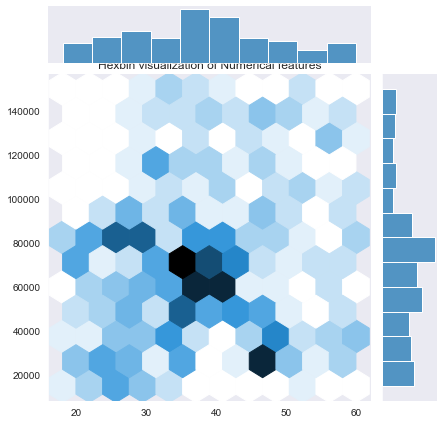

In [27]:
# Jointplot
sns.set_style("dark")
sns.jointplot(x = dataset.iloc[:, 0].values, y = dataset.iloc[:, 1].values ,kind="hex")
plt.title("Hexbin visualization of Numerical features")
plt.show()

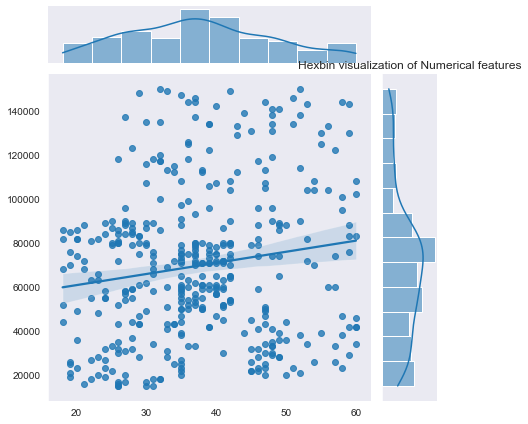

In [28]:
sns.set_style("dark")
sns.jointplot(x = dataset.iloc[:, 0].values, y = dataset.iloc[:, 1].values ,kind="reg")
plt.title("Hexbin visualization of Numerical features")
plt.show()

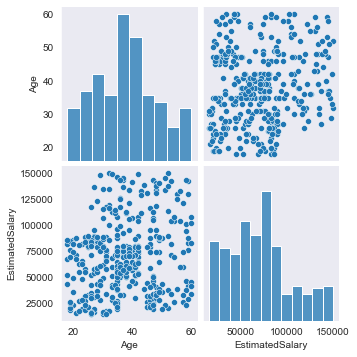

In [29]:
sns.set_style("dark")
sns.pairplot(dataset.iloc[:, [0, 1]])
plt.show()

Modelling

In [30]:
dataset.isna().any()

Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [31]:
dataset.iloc[:,:-1]

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [32]:
dataset.iloc[:,-1]

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dataset.iloc[:, :-1].values, dataset.iloc[:, -1].values, test_size = 0.2, random_state = 42)

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [36]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

In [37]:
models_precisions = []
models_recalls = []
models_accuracy = []
models_f1 = []

In [38]:
def train_predict_and_show_results(model, epochs = None, batch_size = None):
    print("Training the model")
    if epochs != None and batch_size != None:
        model.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size)
    else:
        model.fit(X_train,Y_train)
    print("Training completed")
    if epochs != None and batch_size != None:
        Y_pred = model.predict_classes(X_test)
    else:
        Y_pred = model.predict(X_test)
    precision = round(precision_score(Y_test, Y_pred, zero_division=1), 2)
    recall = round(recall_score(Y_test, Y_pred), 2)
    accuracy = round(accuracy_score(Y_test, Y_pred), 2)
    f1 = round(f1_score(Y_test, Y_pred), 2)
    print(f"Precision : {precision} \nRecall : {recall} \nAccuracy : {accuracy} \nF1 Score : {f1}")
    models_precisions.append(precision)
    models_recalls.append(recall)
    models_accuracy.append(accuracy)
    models_f1.append(f1)

In [39]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
train_predict_and_show_results(log_reg)

Training the model
Training completed
Precision : 0.87 
Recall : 0.71 
Accuracy : 0.86 
F1 Score : 0.78


In [40]:
# Linear SVM(used for Linear data)
from sklearn.svm import LinearSVC
lin_svc = LinearSVC(max_iter=20000)
train_predict_and_show_results(lin_svc)

Training the model
Training completed
Precision : 0.86 
Recall : 0.68 
Accuracy : 0.85 
F1 Score : 0.76


In [42]:
# Kerner SVM (used for non linear data)
from sklearn.svm import SVC
svc = SVC(kernel="rbf")
train_predict_and_show_results(svc)

Training the model
Training completed
Precision : 0.84 
Recall : 0.96 
Accuracy : 0.92 
F1 Score : 0.9


In [43]:
# KNN Classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
train_predict_and_show_results(knn)

Training the model
Training completed
Precision : 0.87 
Recall : 0.93 
Accuracy : 0.92 
F1 Score : 0.9


In [44]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
train_predict_and_show_results(nb)

Training the model
Training completed
Precision : 0.86 
Recall : 0.89 
Accuracy : 0.91 
F1 Score : 0.88


In [45]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
train_predict_and_show_results(dec_tree)

Training the model
Training completed
Precision : 0.71 
Recall : 0.79 
Accuracy : 0.81 
F1 Score : 0.75


In [46]:
# Rando Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
train_predict_and_show_results(forest)

Training the model
Training completed
Precision : 0.76 
Recall : 0.89 
Accuracy : 0.86 
F1 Score : 0.82


RESULTS

In [ ]:
results_df = pd.DataFrame(list(zip(["Logistic Regression", "Linear SVM", "Kernel SVM", "KNN Classifier", 
"Naive Bayes Classifier", "Decision Tree Classifier", "Random Forest Classifier"], 
                                   models_precisions, models_recalls, models_accuracy, models_f1)))
results_df.columns = ["Model Type" ,"Precision", "Recall", "Accuracy", "F1 Score"]